<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/DR_multiclass_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os # operating system, helps for accessing and manipulating the file system
import numpy as np # NumPy, used for working with arrays, linear algebra and matrices.

In [17]:
os.listdir('/content/drive/MyDrive/DR images')

['DR3', 'DR1', 'normal fundus images', 'DR2']

In [18]:
!pip install split-folders
import splitfolders

In [19]:
input = '/content/drive/MyDrive/DR images'
output = '/content/drive/MyDrive/DR images/split'

In [20]:
splitfolders.ratio(input, output, seed=42, ratio=(0.75, 0.15, 0.1), group_prefix=None)

Copying files: 144 files [00:02, 48.33 files/s]


In [21]:
os.listdir('/content/drive/MyDrive/DR images/split')

['train', 'val', 'test']

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/DR images/split/train',
                                          target_size=(64,64), class_mode='categorical')
valimages = datagen.flow_from_directory('/content/drive/MyDrive/DR images/split/val',
                                          target_size=(64,64))
testimages = datagen.flow_from_directory('/content/drive/MyDrive/DR images/split/test',
                                          target_size=(64,64))

Found 106 images belonging to 4 classes.
Found 19 images belonging to 4 classes.
Found 19 images belonging to 4 classes.


In [106]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer ="adam", loss ="categorical_crossentropy", metrics =["accuracy"])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │         492,036 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 492,932 (1.88 MB)

 Trainable params: 492,932 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.fit(trainimages, epochs=10, validation_data=valimages, batch_size=32)
model.save('DRmulticlassCNN_model.keras')

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 956ms/step - accuracy: 0.3637 - loss: 2.1271 - val_accuracy: 0.3158 - val_loss: 1.5206
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - accuracy: 0.4983 - loss: 1.3061 - val_accuracy: 0.5263 - val_loss: 2.3991
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step - accuracy: 0.5664 - loss: 1.7711 - val_accuracy: 0.5263 - val_loss: 1.2803
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.6175 - loss: 1.0441 - val_accuracy: 0.4211 - val_loss: 1.4175
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.7697 - loss: 0.6548 - val_accuracy: 0.6316 - val_loss: 1.0465
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.7772 - loss: 0.5824 - val_accuracy: 0.5789 - val_loss: 1.0494
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - accuracy: 0.7748 - loss: 0.4884 - val_accuracy: 0.5263 - val_loss: 1.0377
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - accuracy: 0.8142 - loss: 0.4236 - val_accuracy: 0.5789 - val_loss

In [129]:
y_pred = model.predict(testimages)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step


In [130]:
y_pred1 = np.argmax(y_pred,axis = 1)
y_pred1

array([3, 0, 0, 2, 1, 0, 1, 3, 1, 1, 1, 0, 2, 3, 1, 1, 0, 3, 3])

In [103]:
y_true = testimages.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
      dtype=int32)

In [104]:
testimages.class_indices

{'DR1': 0, 'DR2': 1, 'DR3': 2, 'normal fundus images': 3}

In [131]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred1)

array([[2, 0, 0, 1],
       [1, 3, 1, 1],
       [1, 2, 1, 1],
       [1, 2, 0, 2]])

In [132]:
print(metrics.classification_report(y_true,y_pred1, target_names=['DR1', 'DR2', 'DR3', 'no DR']))

              precision    recall  f1-score   support

         DR1       0.40      0.67      0.50         3
         DR2       0.43      0.50      0.46         6
         DR3       0.50      0.20      0.29         5
       no DR       0.40      0.40      0.40         5

    accuracy                           0.42        19
   macro avg       0.43      0.44      0.41        19
weighted avg       0.44      0.42      0.41        19



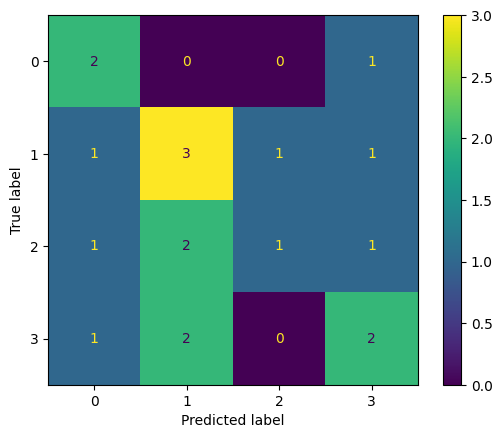

In [133]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred1)

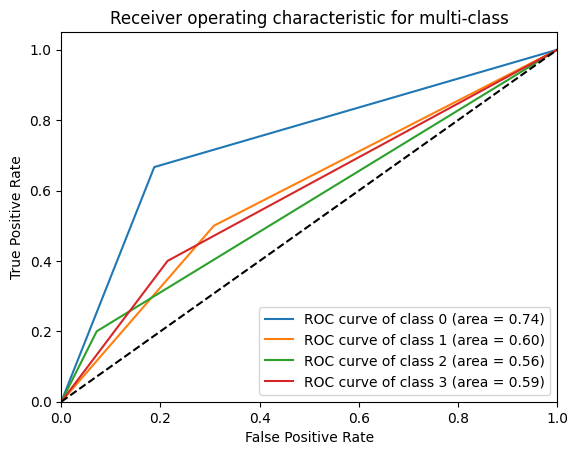

In [134]:
# prompt: plot ROC curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming DR1, DR2, DR3, NO DR are defined elsewhere
y_true_bin = label_binarize(y_true, classes=[0,1,2,3])
y_pred_bin = label_binarize(y_pred1, classes=[0,1,2,3])
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


In [48]:
from keras.preprocessing import image
from keras.models import load_model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: NO DR


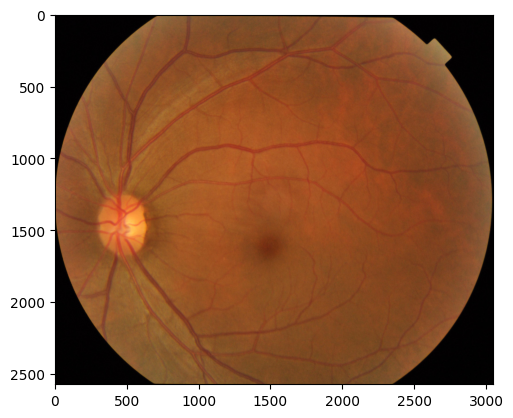

In [50]:
# Load the trained CNN model
model = load_model('/content/DRmulticlassCNN_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["DR1", "DR2", "DR3", "NO DR"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR images/normal fundus images/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide unknown image path
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage =image.load_img('/content/drive/MyDrive/DR images/normal fundus images/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: DR3


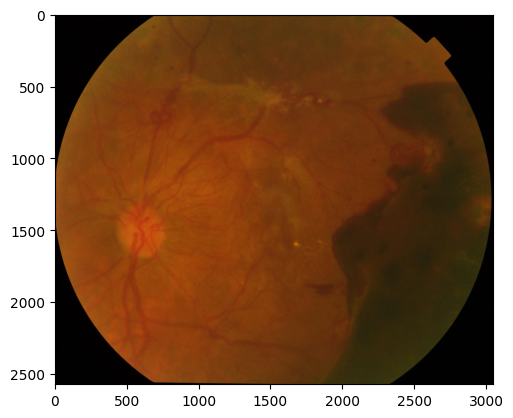

In [51]:
unknown_image_path = "/content/drive/MyDrive/DR images/DR3/1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide unknown image path
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage =image.load_img('/content/drive/MyDrive/DR images/DR3/1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: DR2


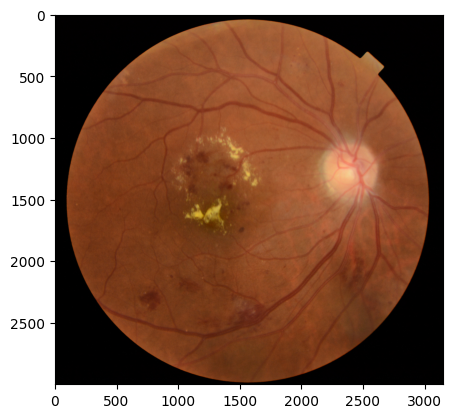

In [52]:
unknown_image_path = "/content/drive/MyDrive/DR images/DR2/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide unknown image path
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage =image.load_img('/content/drive/MyDrive/DR images/DR2/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: DR1


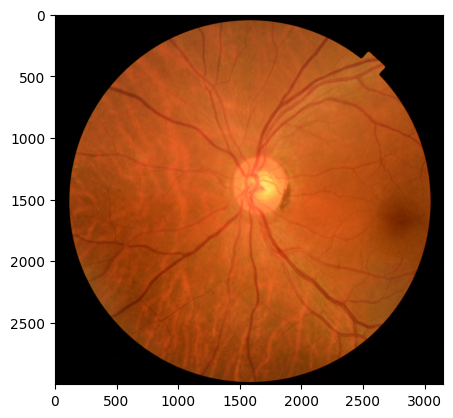

In [54]:
unknown_image_path = "/content/drive/MyDrive/DR images/DR1/1ffa95b8-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide unknown image path
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage =image.load_img('/content/drive/MyDrive/DR images/DR1/1ffa95b8-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)

In [ ]:
unknown_image_path = ""  # Provide unknown image path
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage =image.load_img('')
plt.imshow(testimage)